In [9]:
import pyradex

Type:        module
String form: <module 'pyradex.despotic_interface' from '/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/pyradex/despotic_interface.py'>
File:        /orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/pyradex/despotic_interface.py
Docstring:   <no docstring>


In [2]:
import despotic

In [4]:
ls /orange/adamginsburg/repos/pyradex/lamda/

co.dat  nacl.dat  ph2co-h2.dat  sio-h2.dat


In [9]:
from astroquery.lamda import Lamda

In [12]:
Lamda.download_molfile('ch3oh_a', outfilename='/orange/adamginsburg/repos/pyradex/lamda/ch3oh_a.dat')

In [57]:
rr = pyradex.Radex(species='ch3oh_a', column=1e14, density=1e5, temperature=50)

/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/pyradex/core.py:542: UserWarning: Using a default ortho-to-para ratio (which will only affect species for which independent ortho & para collision rates are given)
  warnings.warn("Using a default ortho-to-para ratio (which "


In [20]:
#dd = pyradex.despotic_interface.Despotic(species='ch3oh_a', hcolumn=1e22, abundance=1e-8, collider_densities={'ph2': 1e5, 'oh2': 1e5}, temperature=50)
#dtbl = dd()

In [17]:
import numpy as np

In [24]:
tbl = rr()

In [41]:
np.argmax((tbl['upperlevel'] == b'3_1   ') & (tbl['lowerlevel'] == b'4_0   '))

62

In [46]:
densities = np.logspace(2, 7, 50)

In [58]:
rslts = [rr(density=dens)[62]['Tex','tau'] for dens in densities]

/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/pyradex/core.py:968: RuntimeWarning: invalid value encountered in divide
  frac_level_diff = level_diff/self.level_population
/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/pyradex/core.py:1056: RuntimeWarning: overflow encountered in exp
  bnutex = thc*xt/(np.exp(earg)-1.0)


In [59]:
tex = [r['Tex'] for r in rslts]
tau = [r['tau'] for r in rslts]

In [60]:
import pylab as pl

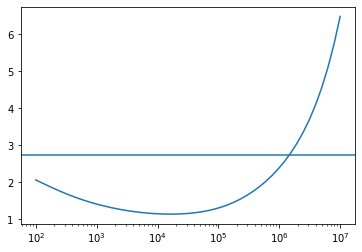

In [61]:
pl.semilogx(densities, tex)
pl.axhline(2.73)

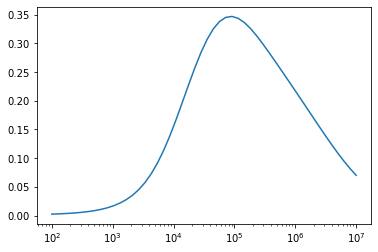

In [62]:
pl.semilogx(densities, tau)

In [1]:

from despotic import cloud

In [2]:
g5 = cloud()
g5.nH = 1.0e2
g5.colDen = 1.0e22
g5.sigmaNT = 2.0e5
g5.Tg = 10.0
g5.comp.xoH2 = 0.1
g5.comp.xpH2 = 0.4
g5.comp.xHe = 0.1
#g5.TradDust = 1.0

In [5]:
g5.addEmitter("ch3oh_a", 1.0e-8)

Fetching LAMDA datafile from http://home.strw.leidenuniv.nl/~moldata/datafiles/ch3oh_a.dat...


In [7]:
lines = g5.lineLum("ch3oh_a")

/blue/adamginsburg/adamginsburg/repos/despotic/despotic/radiation.py:107: RuntimeWarning: divide by zero encountered in divide
  expfacdust = np.exp(-Tnu/self.TradDust)
/blue/adamginsburg/adamginsburg/repos/despotic/despotic/cloud.py:1818: RuntimeWarning: divide by zero encountered in double_scalars
  'Tex' : em.data.dT[u[i],l[i]] / \


In [8]:
lines

[{'freq': 834280000.0,
  'upper': 5,
  'lower': 4,
  'Tupper': 16.881169103753656,
  'Tex': -2.8198241523002006,
  'lumPerH': 6.7345512319548314e-40,
  'intIntensity': 5.359185525920029e-19,
  'intTB': 0.0009077337850877994,
  'tau': -2.4267304824561602e-05,
  'tauDust': 3.206263079545607e-08},
 {'freq': 1120370000.0,
  'upper': 73,
  'lower': 72,
  'Tupper': 165.40178983785222,
  'Tex': -0.04032049700442713,
  'lumPerH': 1.0665566997193975e-50,
  'intIntensity': 8.487388358369601e-30,
  'intTB': 6.655899621925249e-07,
  'tau': -3.163824185921756e-16,
  'tauDust': 5.782270861938301e-08},
 {'freq': 1616593000.0,
  'upper': 86,
  'lower': 85,
  'Tupper': 190.94007941354707,
  'Tex': -0.06354599944052072,
  'lumPerH': 1.1226785559116425e-51,
  'intIntensity': 8.933991680506787e-31,
  'intTB': 5.762517216914176e-07,
  'tau': -1.0930040932761935e-17,
  'tauDust': 1.2038624737446657e-07},
 {'freq': 2260312000.0,
  'upper': 97,
  'lower': 96,
  'Tupper': 218.80055486953324,
  'Tex': -0.094954